In [2]:
import sys
#sys.modules.pop('CLASS_BABY')
#sys.modules.pop('CLASS_SAMPLE')

from CLASS_BABY import *
from CLASS_SAMPLE import *

import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

In [3]:
T = pd.read_csv('../TOST_data/average_properties.txt',sep='\t',index_col=0,na_values=-99)

In [85]:
def median_in_bins_err(x,y,x1,x2,nbins,p1=0.25,p2=0.75):
    medians_x = np.zeros(nbins)
    medians_y = np.zeros(nbins)
    err_y_low = np.zeros(nbins)
    err_y_high = np.zeros(nbins)
    x = np.array(x)
    y = np.array(y)
    width = (float(x2)-float(x1))/nbins
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        #print x_low, x_high
        sel = np.where((x>x_low)&(x<x_high))
        temp_ord = np.copy(y[sel])
        temp_ord = np.sort(temp_ord)
        medians_y[i] = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
        err_y_low[i]  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-medians_y[i])
        err_y_high[i]  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-medians_y[i])
        #err_y[i] = [err_y_low,err_y_high]
        medians_x[i] = np.median(x[sel])
    return np.array(medians_x),np.array(medians_y),err_y_low,err_y_high

In [4]:
b = baby('FMC003')

Time spent to generate the plot: 0:02:18.462058


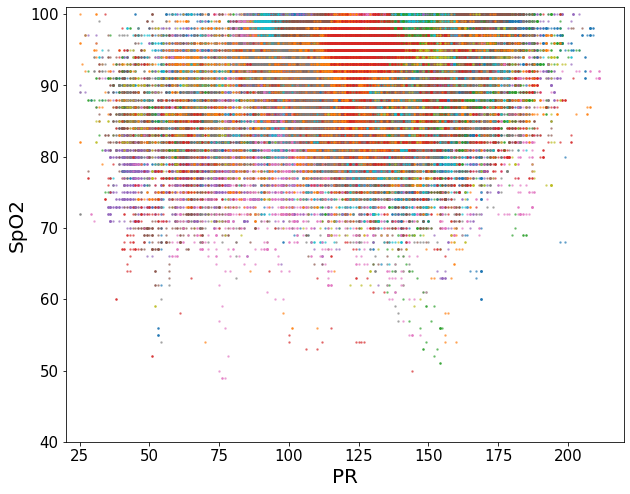

In [56]:
startTime = datetime.now()
fig = plt.figure(0,figsize=(10,8))
ids = np.unique(T['BABY_IDS'])
for b_id in ids:
    b = baby(b_id)
    for m in range(len(b.files)):
        pr = b.measurements[m]['PR']
        spo2 = b.measurements[m]['SpO2']
        plt.plot(pr,spo2,".",alpha=0.5,markersize=3)
plt.xlabel('PR')
plt.ylabel('SpO2')
plt.xlim(20,220)
plt.ylim(40,101)
#plt.show()
print('Time spent to generate the plot:',datetime.now() - startTime)

# generate long array containing all the data

In [75]:
startTime = datetime.now()
###########################
PR_TOT = np.array([])
SPO2_TOT = np.array([])
ids = np.unique(T['BABY_IDS'])
for b_id in ids:
    b = baby(b_id)
    for m in range(len(b.files)):
        pr = b.measurements[m]['PR']
        spo2 = b.measurements[m]['SpO2']
        PR_TOT   = np.concatenate((PR_TOT, pr), axis=None)
        SPO2_TOT = np.concatenate((SPO2_TOT, spo2), axis=None)
print('Time spent to crate arrays:',datetime.now() - startTime)

Time spent to crate arrays: 0:02:12.529313


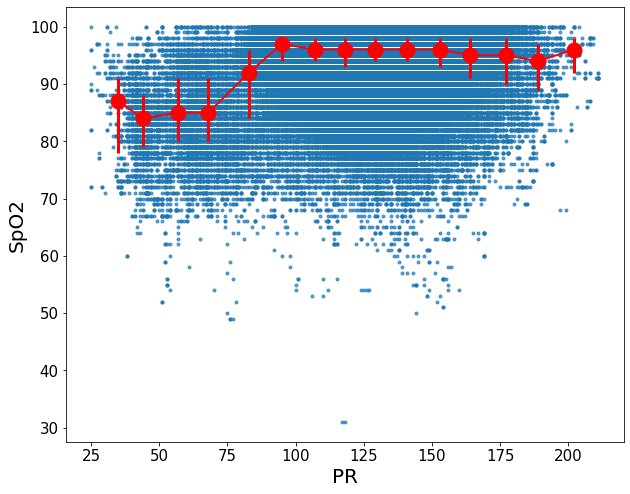

In [92]:
plt.figure(figsize=(10,8))
sel = np.where((PR_TOT>10.)&(SPO2_TOT>10.))
plt.plot(PR_TOT[sel],SPO2_TOT[sel],".",alpha=0.7)

xx,yy,ey1,ey2 = median_in_bins_err(PR_TOT[sel],SPO2_TOT[sel],25,210,15)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',label ='median',zorder=11)
plt.plot(xx,yy,color="red",lw=2)

#plt.ylim(75,100)

plt.xlabel('PR')
plt.ylabel('SpO2')
plt.show()

In [95]:
len(PR_TOT[sel])

992678

In [96]:
len(SPO2_TOT[sel])

992678

In [97]:
len(PR_TOT[sel])/len(PR_TOT)

0.9762755937494161